In [ ]:
!pip install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.1+cu118 --extra-index-url https://download.pytorch.org/whl/cu118
!pip install transformers==4.25.1
!sudo apt install tesseract-ocr
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB ? eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cpu
    Uninstalling torch-2.5.1+cpu:
      Successfully uninstalled torch-2.5.1+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cpu
    Uninstalling torchvision-0.20.1+cpu:
      Successfully uninstalled torchvision-0.20.1+cpu
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cpu
    Uninstall

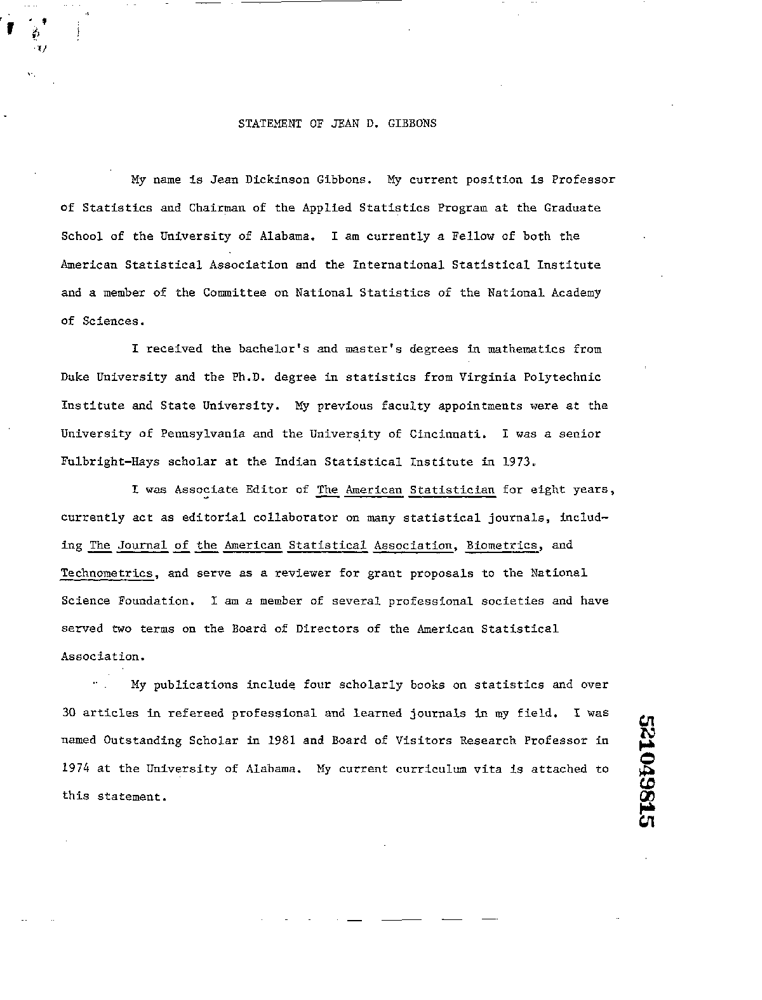

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("0000157402.tif")
image = image.convert("RGB")
image

In [ ]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

"ot uv STATEMENT OF JEAN D, GIBBONS My name 4s Jean Dickinson Gibbons. My current position is Professor of Statistics and Chairman of the Applied Statistics Program at the Graduate School of the University of Alabana, I am currently a Fellow of both the American Statistical Association and the International Statistical Institute and a menber of the Committee on National Statistics of the National, Acadeny of Scdences. I received the bachelor's and master's degrees in mathematics from Duke University and the Ph.D. degree in statistics from Virginia Polytechnic Institute and State University. My previous faculty appointments were at the University of Pennsylvania and the University of Cincinnati. I was a senior Fulbright-Hays scholar at the Indian Statistical Institute in 1973. Twas Associate Editor of The Anertcan Statistician for eight years, currently act as editortal collaborator on many statistical journals, includ~ Technometrics, and serve as a reviewer for grant proposals to the N

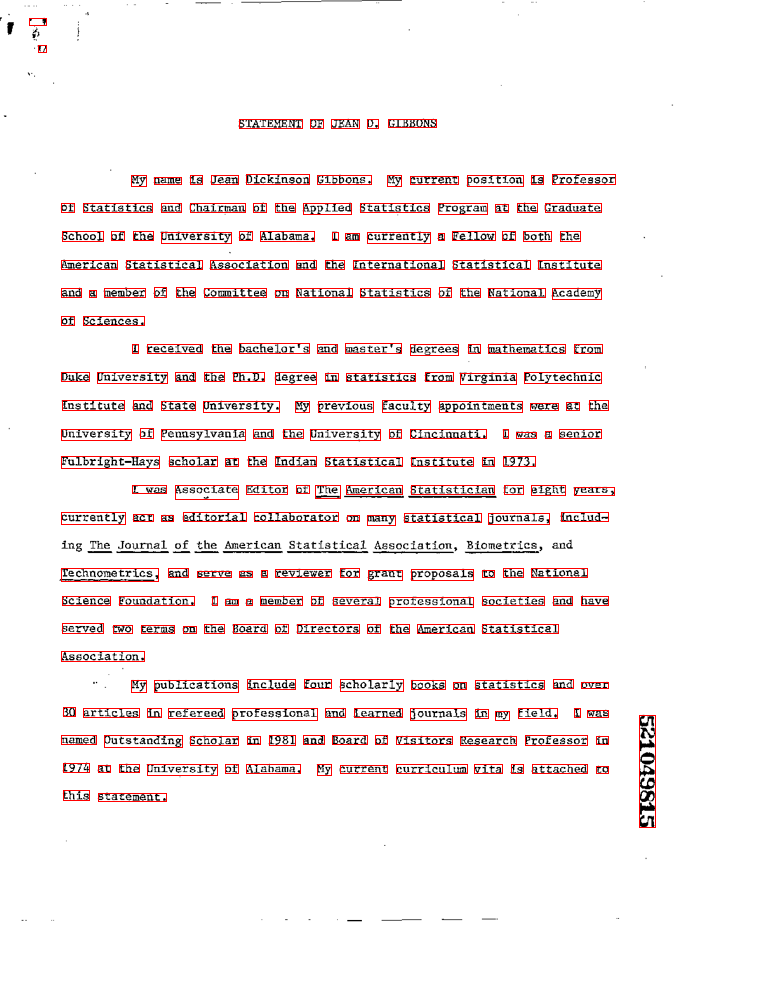

In [ ]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image


In [ ]:
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("aharley/rvl_cdip")

print(dataset)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.1/231.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.1/344.1 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.12.0
    Uninstalling fsspec-2024.12.0:
 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

rvl_cdip.py:   0%|          | 0.00/4.80k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/2.64k [00:00<?, ?B/s]

The repository for aharley/rvl_cdip contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/aharley/rvl_cdip.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


rvl-cdip.tar.gz:   0%|          | 0.00/38.8G [00:00<?, ?B/s]

train.txt:   0%|          | 0.00/13.7M [00:00<?, ?B/s]

test.txt:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

val.txt:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/320000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/40000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/40000 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/77 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 320000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 40000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 40000
    })
})


{'image': <PIL.Image.Image image mode=L size=754x1000 at 0x7FEB1F150350>, 'label': 2}


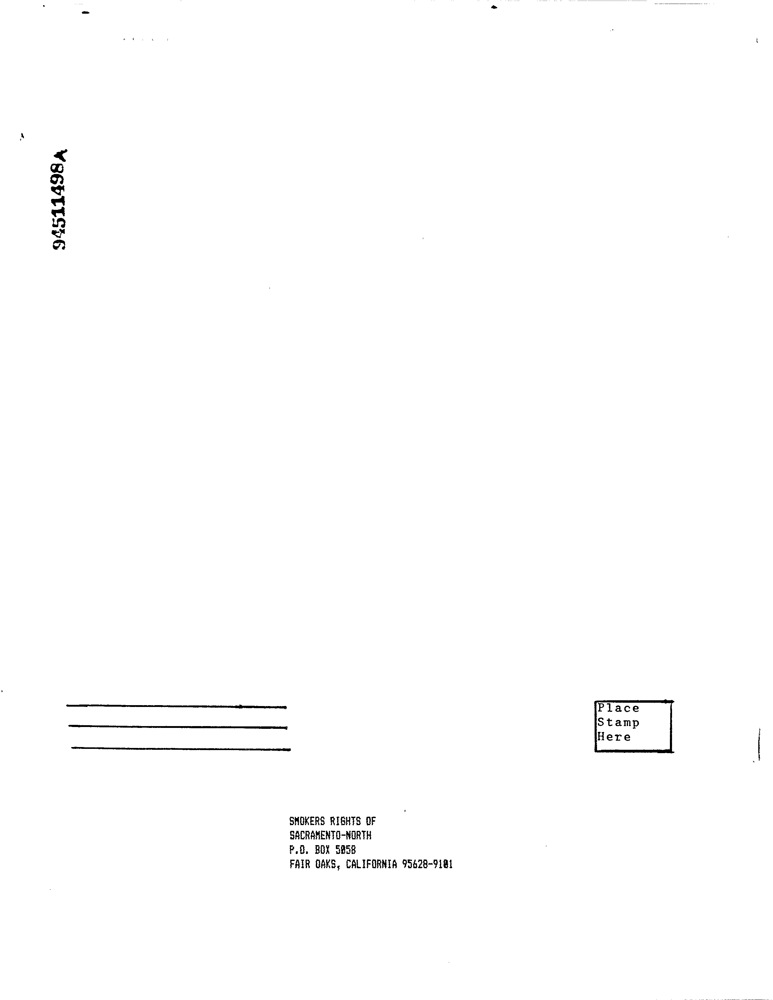

In [ ]:
print(dataset["train"][10000])
image = dataset["validation"][333]["image"]

# image 現在是一個 PIL.Image 物件，您可以直接使用它
image = image.convert("RGB")

# 顯示圖像
image

In [84]:
label2idx = {
    0: 'letter',
    1: 'form',
    2: 'email',
    3: 'handwritten',
    4: 'advertisement',
    5: 'scientific report',
    6: 'scientific publication',
    7: 'specification',
    8: 'file folder',
    9: 'news article',
    10: 'budget',
    11: 'invoice',
    12: 'presentation',
    13: 'questionnaire',
    14: 'resume',
    15: 'memo',
}

In [ ]:
len(dataset)

3

In [ ]:
from datasets import Dataset

def normalize_box(box, width, height):
     return [
         int(1000 * (box[0] / width)),
         int(1000 * (box[1] / height)),
         int(1000 * (box[2] / width)),
         int(1000 * (box[3] / height)),
     ]

def apply_ocr(example):
        # get the image
        image = example["image"]

        width, height = image.size

        # apply ocr to the image
        ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
        float_cols = ocr_df.select_dtypes('float').columns
        ocr_df = ocr_df.dropna().reset_index(drop=True)
        ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
        ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
        ocr_df = ocr_df.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        #words = [word for word in ocr_df.text if str(word) != 'nan'])
        words = list(ocr_df.text)
        words = [str(w) for w in words]
        coordinates = ocr_df[['left', 'top', 'width', 'height']]
        actual_boxes = []
        for idx, row in coordinates.iterrows():
            x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
            actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
            actual_boxes.append(actual_box)

        # normalize the bounding boxes, *****skipped(displacement)
        boxes = []
        for box in actual_boxes:
            boxes.append(normalize_box(box, width, height))

        # add as extra columns
        assert len(words) == len(boxes)
        example['words'] = words
        example['bbox'] = actual_boxes
        return example

updated_dataset = dataset['train']

# test, so ocr 10 row datas only
updated_dataset = updated_dataset.select(range(10))

updated_dataset = updated_dataset.map(apply_ocr)

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

In [ ]:
print(updated_dataset[3])

image2 = updated_dataset[3]["image"]
image2 = image2.convert("RGB")

draw = ImageDraw.Draw(image2, "RGB")
for box2 in updated_dataset[3]["bbox"]:
  draw.rectangle(box2, outline='green')

image2
type(updated_dataset[3]["image"])

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=777x1000 at 0x7FE5C505B750>, 'label': 9, 'words': ['RECEIPT', 'MAIL,', 'REGISTER', '0', '1.SEP.', '1989', 'Altefnativen', 'zum', 'Tierversuch', '°', 'BERLIN', '-', 'Mit', '63', '000°', 'DM', 'frdert', 'die', 'Schering', 'AG', 'vom', 'Oklober', '1989', 'an', 'fir', 'drei', 'Jahre', 'ein', 'von', 'den', 'Tierversuchsgegnern', 'line', 'V.iniertes', 'Projet', 'ur', 'ss', 'pRaietog', 'aenater', 'Tes', 'zum', 'Tierersuch,', 'Kifurga', 'van', 'menscichen', 'HautelleiPollen', 'den', 'Test', 'am', 'Kaninehenauge', 'er-', 'setzen,', 'mit', 'glem?', 'bisher', 'die', 'schmerchatie™', 'Refewikung', 'son', 'Areneumiteln,', 'und', 'Chenkalen', 'berpeutt', 'wurde.', 'Auserdens', 'soll', 'seklact', 'werden,', 'tiwiewent', 'Haste', 'zellkulturen', 'eine', 'Alernative', 'dat', 'POjekd', 'im', 'Krebsforschungszentrum', 'Heidelberg', 'stellen', 'fur', 'die', 'bisher', 'ubliche', 'Te-', 'stung', 'krebserzeugender', 'Subst', 'zen', 'auf', 'der', 'H

PIL.PngImagePlugin.PngImageFile

In [ ]:
from transformers import LayoutLMTokenizer
import torch

tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

def encode_example(example, max_seq_length=512, pad_token_box=[0, 0, 0, 0]):
  words = example['words']
  normalized_word_boxes = example['bbox']

  assert len(words) == len(normalized_word_boxes)

  token_boxes = []
  for word, box in zip(words, normalized_word_boxes):
      word_tokens = tokenizer.tokenize(word)
      token_boxes.extend([box] * len(word_tokens))

  # Truncation of token_boxes
  special_tokens_count = 2
  if len(token_boxes) > max_seq_length - special_tokens_count:
      token_boxes = token_boxes[: (max_seq_length - special_tokens_count)]

  # add bounding boxes of cls + sep tokens
  token_boxes = [[0, 0, 0, 0]] + token_boxes + [[1000, 1000, 1000, 1000]]

  encoding = tokenizer(' '.join(words), padding='max_length', truncation=True)
  # Padding of token_boxes up the bounding boxes to the sequence length.
  input_ids = tokenizer(' '.join(words), truncation=True)["input_ids"]
  padding_length = max_seq_length - len(input_ids)
  token_boxes += [pad_token_box] * padding_length
  encoding['bbox'] = token_boxes
  encoding['label'] = label2idx[example['label']]

  assert len(encoding['input_ids']) == max_seq_length
  assert len(encoding['attention_mask']) == max_seq_length
  assert len(encoding['token_type_ids']) == max_seq_length
  assert len(encoding['bbox']) == max_seq_length

  return encoding

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/170 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

In [ ]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Image

all_labels = ['letter', 'form', 'email', 'handwritten', 'advertisement',
              'scientific report', 'scientific publication', 'specification',
              'file folder', 'news article', 'budget', 'invoice',
              'presentation', 'questionnaire', 'resume', 'memo']
# we need to define the features ourselves as the bbox of LayoutLM are an extra feature
features = Features({
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    # 'label': ClassLabel(names=['refuted', 'entailed']),
    'label': ClassLabel(names=all_labels),
    'image': Image(),
    'words': Sequence(feature=Value(dtype='string')),
})

encoded_dataset = updated_dataset.map(lambda example: encode_example(example),
                                      features=features)

In [ ]:
print(encoded_dataset[3])

{'input_ids': [101, 24306, 5653, 1010, 4236, 1014, 1015, 1012, 19802, 1012, 2960, 12456, 12879, 19833, 3512, 2078, 16950, 2213, 7563, 14028, 10875, 1080, 4068, 1011, 10210, 6191, 2199, 7737, 1040, 2213, 10424, 4063, 2102, 3280, 8040, 22658, 12943, 29536, 2213, 7929, 4135, 5677, 2960, 2019, 21554, 2852, 7416, 14855, 28362, 16417, 3854, 7939, 7563, 14028, 10875, 28745, 13910, 3678, 2078, 2240, 1058, 1012, 1999, 3771, 4570, 4013, 15759, 24471, 7020, 10975, 4886, 18903, 2290, 29347, 12556, 2099, 8915, 2015, 16950, 2213, 7563, 2545, 10875, 1010, 11382, 27942, 3654, 3158, 2273, 11020, 17322, 2078, 18535, 6216, 11514, 14511, 2368, 7939, 3231, 2572, 22827, 3170, 10222, 4887, 3351, 9413, 1011, 2275, 10431, 1010, 10210, 1043, 16930, 1029, 20377, 5886, 3280, 8040, 14227, 2121, 7507, 9515, 30108, 25416, 7974, 5480, 5575, 2365, 4995, 14820, 4221, 19666, 1010, 6151, 8802, 12902, 2368, 2022, 14536, 13765, 4779, 8814, 25547, 1012, 17151, 2121, 4181, 2015, 14017, 2140, 7367, 26086, 6593, 2057, 18246, 1

In [80]:
encoded_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])

In [81]:
dataloader = torch.utils.data.DataLoader(encoded_dataset, batch_size=1, shuffle=True)
batch = next(iter(dataloader))
batch

{'input_ids': tensor([[  101, 24306,  5653,  1010,  4236,  1014,  1015,  1012, 19802,  1012,
           2960, 12456, 12879, 19833,  3512,  2078, 16950,  2213,  7563, 14028,
          10875,  1080,  4068,  1011, 10210,  6191,  2199,  7737,  1040,  2213,
          10424,  4063,  2102,  3280,  8040, 22658, 12943, 29536,  2213,  7929,
           4135,  5677,  2960,  2019, 21554,  2852,  7416, 14855, 28362, 16417,
           3854,  7939,  7563, 14028, 10875, 28745, 13910,  3678,  2078,  2240,
           1058,  1012,  1999,  3771,  4570,  4013, 15759, 24471,  7020, 10975,
           4886, 18903,  2290, 29347, 12556,  2099,  8915,  2015, 16950,  2213,
           7563,  2545, 10875,  1010, 11382, 27942,  3654,  3158,  2273, 11020,
          17322,  2078, 18535,  6216, 11514, 14511,  2368,  7939,  3231,  2572,
          22827,  3170, 10222,  4887,  3351,  9413,  1011,  2275, 10431,  1010,
          10210,  1043, 16930,  1029, 20377,  5886,  3280,  8040, 14227,  2121,
           7507,  9515, 301

In [87]:
tokenizer.decode(batch['input_ids'][0].tolist())


'[CLS] receipt mail, register 0 1. sep. 1989 altefnativen zum tierversuch ° berlin - mit 63 000° dm frdert die schering ag vom oklober 1989 an fir drei jahre ein von den tierversuchsgegnern line v. iniertes projet ur ss praietog aenater tes zum tierersuch, kifurga van menscichen hautelleipollen den test am kaninehenauge er - setzen, mit glem? bisher die schmerchatie™ refewikung son areneumiteln, und chenkalen berpeutt wurde. auserdens soll seklact werden, tiwiewent haste zellkulturen eine alernative dat pojekd im krebsforschungszentrum heidelberg stellen fur die bisher ubliche te - stung krebserzeugender subst zen auf der haut lebender mi 5. das projekt wird im deute schen krebsforschungszenteum heidelberg in der abteilung yon professor vriedrich marks durchgetulirt. professor marks untersucht die funktion der pro - feinkinase c, einem schlissel - eueyin ber der entstehung von hautkrebs. fur diese forschun - enstellte de dr. mildted scheel » stttung 432 00 dm zur verte jung. s sch datu

In [86]:
label2idx[batch['label'][0].item()]

'news article'

In [88]:
from transformers import LayoutLMForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMForSequenceClassification.from_pretrained("microsoft/layoutlm-base-uncased", num_labels=len(label2idx))
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/451M [00:00<?, ?B/s]

Some weights of LayoutLMForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlm-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LayoutLMForSequenceClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0-11): 12 x LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True